In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
X = np.array([[1.0,1.0],[1.0,2.0],[2.0,1.0],[2.0,2.0]])
Y = np.array([1.0,0.0,0.0,1.0])
print(X.shape, Y.shape)

((4, 2), (4,))


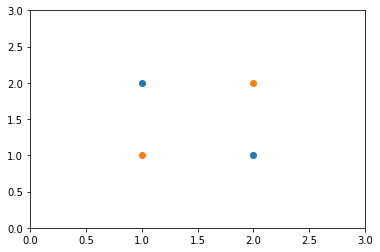

In [24]:
plt.scatter(X[:,0][Y == 0.0], X[:,1][Y == 0.0])
plt.scatter(X[:,0][Y == 1.0], X[:,1][Y == 1.0])
plt.ylim((0,3))
plt.xlim((0,3))
plt.show()

## NN step-by-step

In [98]:
def sigmoid(x):  
    return math.exp(-np.logaddexp(0, -x))
sigmoid_v = np.vectorize(sigmoid)

In [99]:
def mse(x, z):
    return np.average(np.power(x - z, 2))

Initializing weight

In [44]:
W1 = np.random.rand(2,3)
W2 = np.random.rand(1,3)
print(W1)
print(W2)

[[0.14313363 0.47317427 0.04965569]
 [0.1856778  0.83612177 0.14575483]]
[[0.00065237 0.43555032 0.62901206]]


Adding bias to first input

In [45]:
x = np.insert(X[0,:], 0, 1)
x

array([1., 1., 1.])

Calculating first layer output

In [50]:
x = np.insert(sigmoid_v(x.dot(W1.T)), 0, 1)
x

array([1.        , 0.66059875, 0.76270268])

Calculating second layer (NN) output

In [52]:
sigmoid_v(x.dot(W2.T))[0]

0.6831152722862225

## NN class

In [296]:
class Layer:
    
    def __init__(self, size, previous = None):
        
        self.size = size
        self.previous = previous
        
        if previous is not None:
            self.W = np.random.rand(size, previous.size + 1)

    def forward(self, x):
        return sigmoid_v(x.dot(self.W.T))

In [450]:
class NN:
    
    eta = 0.05
    
    def __init__(self, input_size):
        self.layers = [ Layer(input_size) ]
    
    def append(self, size):
        self.layers.append(Layer(size, self.layers[-1]))
        return self

    def forward(self, x):
        ret = [ x ]
        for i in range(1,len(self.layers)):
            x = self.layers[i].forward(np.insert(x, 0, 1))
            ret.append(x)
        return ret
    
    def error(self, x, y):
        z = self.forward(x)
        return mse(z[-1], y)
        
    def delta(self, x, y):
        d = []
        Z = np.flip(self.forward(x))
        n = len(self.layers)
        for i in range(0, len(Z) - 1):
            z = Z[i]
            if i == 0:
                d.insert(0, (z - y) * z * (1 - z))
            else:
                d.insert(0, self.layers[n - i].W[:,1:] * np.sum(Z[i - 1]) * z * (1 - z))
        return d
    
    def gradient(self, x, y):
        g = []
        Z = self.forward(x)
        D = self.delta(x, y)
        for i in range(0,len(self.layers) - 1):
            
            shape = self.layers[i + 1].W.shape
            
            d = D[i]
            d1 = np.repeat(d[:, np.newaxis], shape[1], axis = 1)[0].T
            #print(d1)
            
            z = np.insert(Z[i], 0, 1)
            z1 = np.repeat(z[:,np.newaxis], shape[0], axis=1).T
            #print(z1)
            
            g.append(z1 * d1)
            
        return g

In [451]:
nn = NN(2).append(2).append(1)
nn

<__main__.NN instance at 0x7f7e3ca23290>

In [452]:
x = X[0]
y = Y[0]
print(x,y)

(array([1., 1.]), 1.0)


In [453]:
nn.forward(x)

[array([1., 1.]), array([0.83382214, 0.77633614]), array([0.92108368])]

In [454]:
nn.error(x,y)

0.00622778579223855

In [455]:
nn.delta(x,y)

[array([[0.1148998 , 0.15109136]]), array([-0.00573631])]

In [456]:
nn.gradient(x,y)

[array([[0.1148998 , 0.1148998 , 0.1148998 ],
        [0.15109136, 0.15109136, 0.15109136]]),
 array([[-0.00573631, -0.00478306, -0.00445331]])]